The approach to the given homework:</br>
1. We were taught in week08's class to standardize the data. I am using professor's code to transform the given data. 
2. Using the sklearn library and its inbuilt function "Kmeans" to find the optimum numbers of clusters. 
3. Using the WCSS (Elbow plot). We have to ake a balance between variation among clusters and the data points among each cluster. Elbow method gives us the optimal number of kmeans clusters. 
4. We apply Kmeans on the dataset. We start with selecting  the number K to decide the number of clusters for the given dataset. The algorithm selcts random K points (centroids) which may or maynot be input data points. The Kmeans algorithm runs loop and in each loop it calculates the variance and places a new centroid of each cluster.
5. We make the list of the number of the centroids obtained at the end of the loop.  
6. Predict the target and compare the results. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans

In [ ]:
dataset  = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = dataset.iloc[:, 3:13].values #what does .values do?
X
Y = dataset.iloc[:, 13].values
Y

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelEnc = male = 0, Female = 1, will put the labels
labelencoder = LabelEncoder()
X[:,2] = labelencoder.fit_transform(X[:,2])
X[:,1] = labelencoder.fit_transform(X[:,1])
print(X[:,2])

[0 0 0 ... 0 1 0]


In [ ]:
from sklearn.compose import ColumnTransformer
ct  = ColumnTransformer([("Country,", OneHotEncoder(), [1])], remainder = 'passthrough') #just touch the first column
X = ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
#create pandas dataframe
X = pd.DataFrame(X, columns=["X1","X2","X3", "Credit Score", "Gender", "Age", "Tenure", "Balance", "NumOfProducts",	"HasCrCard",	"IsActiveMember",	"EstimatedSalary"])

In [ ]:
cluster_range = range(2,10)
cluster_errors = []
#we will have three things available
#1. center
#2. label
#3. inertia
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 2)
  clusters.fit(X)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )

#combine the cluster_range and cluster_errors into a dataframe by combining them
#creating a dict with the columns
clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_error": cluster_errors})
clusters_df

#minimum the error the better the cluster is

,num_clusters,cluster_error
0,2,3.836253e+13
1,3,2.281727e+13
2,4,1.369056e+13
3,5,1.084162e+13
4,6,9.026425e+12
5,7,7.796299e+12
6,8,6.579043e+12
7,9,5.980010e+12


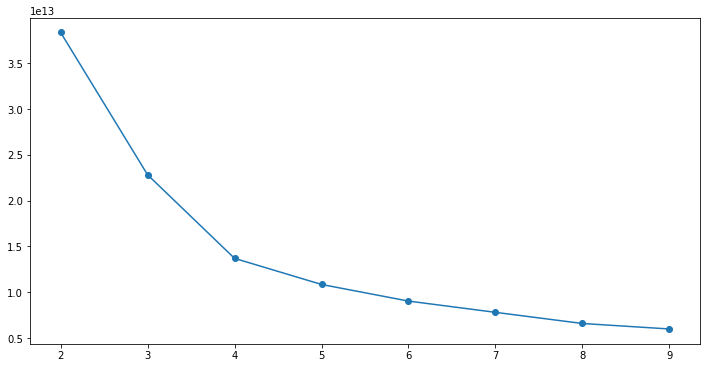

In [ ]:
#Elbow plot
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_error, marker = 'o');

In [ ]:
cluster = KMeans(n_clusters = 6, random_state =1)
#what does random_state do?
#for same centroid
cluster.fit(X)
KMeans(n_clusters=6, random_state=1)

KMeans(n_clusters=6, random_state=1)

In [ ]:
centroids = cluster.cluster_centers_
centroids

array([[4.02884615e-01, 4.00480769e-01, 1.96634615e-01, 6.51723558e+02,
        5.55769231e-01, 3.92144231e+01, 4.92355769e+00, 1.22062252e+05,
        1.36730769e+00, 7.00480769e-01, 5.27884615e-01, 3.47414775e+04],
       [4.00195695e-01, 3.99217221e-01, 2.00587084e-01, 6.51541096e+02,
        5.45988258e-01, 3.90053816e+01, 5.02005871e+00, 1.22327362e+05,
        1.40508806e+00, 6.90802348e-01, 5.03424658e-01, 1.67174199e+05],
       [6.60601266e-01, 1.81962025e-02, 3.21202532e-01, 6.51831487e+02,
        5.43512658e-01, 3.82246835e+01, 5.10601266e+00, 2.61830238e+03,
        1.76503165e+00, 7.15981013e-01, 5.18196203e-01, 1.66069572e+05],
       [6.59591837e-01, 1.38775510e-02, 3.26530612e-01, 6.52735510e+02,
        5.50204082e-01, 3.86277551e+01, 5.06612245e+00, 2.20860891e+03,
        1.76816327e+00, 7.37142857e-01, 5.17551020e-01, 3.15721309e+04],
       [4.10576923e-01, 3.87019231e-01, 2.02403846e-01, 6.50242788e+02,
        5.44230769e-01, 3.93538462e+01, 5.00384615e+00, 1.21

In [ ]:
centroid_df = pd.DataFrame(centroids, columns = list(X))

In [ ]:
prediction = cluster.predict(X)
#Is to predict in which cluster each wine will go
#Once the cluster numbers are predicted, I want to insert a new column in my data set
# Calle Groupp and here I will put the cluster number
X["Group"] = pd.DataFrame(prediction, columns= ["Group"])
#Print the first 20 elements in the dataframe to verify if the cluster numbers appear under column Group
print(X.head(5))
# Count the number of wines in each Cluster
print(X.groupby("Group").count())
#Based on the wine quality group the wines and see how many wines are in each Quality
print(dataset.groupby("Exited").count())

    X1   X2   X3 Credit Score Gender Age Tenure    Balance NumOfProducts  \
0  1.0  0.0  0.0          619      0  42      2        0.0             1   
1  0.0  0.0  1.0          608      0  41      1   83807.86             1   
2  1.0  0.0  0.0          502      0  42      8   159660.8             3   
3  1.0  0.0  0.0          699      0  39      1        0.0             2   
4  0.0  0.0  1.0          850      0  43      2  125510.82             1   

  HasCrCard IsActiveMember EstimatedSalary  Group  
0         1              1       101348.88      5  
1         0              1       112542.58      4  
2         1              0       113931.57      4  
3         0              0        93826.63      5  
4         1              1         79084.1      4  
         X1    X2    X3  Credit Score  Gender   Age  Tenure  Balance  \
Group                                                                  
0      2079  2079  2079          2079    2079  2079    2079     2079   
1      2048  20